### **K-MEANS MODEL - Housing**

In [1]:
import pandas as pd 

df = pd.read_csv("housing.csv")
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [2]:
# Eliminating non-target variables

df.drop(["HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup","MedHouseVal"], axis = 1, inplace = True)
df.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [4]:
# Creating a Train and Test model

from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df, test_size = 0.2, random_state = 42)

X_train.head()

,MedInc,Latitude,Longitude
14196,3.2596,32.71,-117.03
8267,3.8125,33.77,-118.16
17445,4.1563,34.66,-120.48
14265,1.9425,32.69,-117.11
2271,3.5542,36.78,-119.80


In [6]:
# Builing K-Means

from sklearn.cluster import KMeans

model_unsup = KMeans(n_clusters = 6, n_init = "auto", random_state = 88)
model_unsup.fit(X_train)

KMeans(n_clusters=6, random_state=88)

In [7]:
# Set training

y_train = list(model_unsup.labels_)
X_train["cluster"] = y_train
X_train.head()

,MedInc,Latitude,Longitude,cluster
14196,3.2596,32.71,-117.03,5
8267,3.8125,33.77,-118.16,5
17445,4.1563,34.66,-120.48,3
14265,1.9425,32.69,-117.11,5
2271,3.5542,36.78,-119.80,3


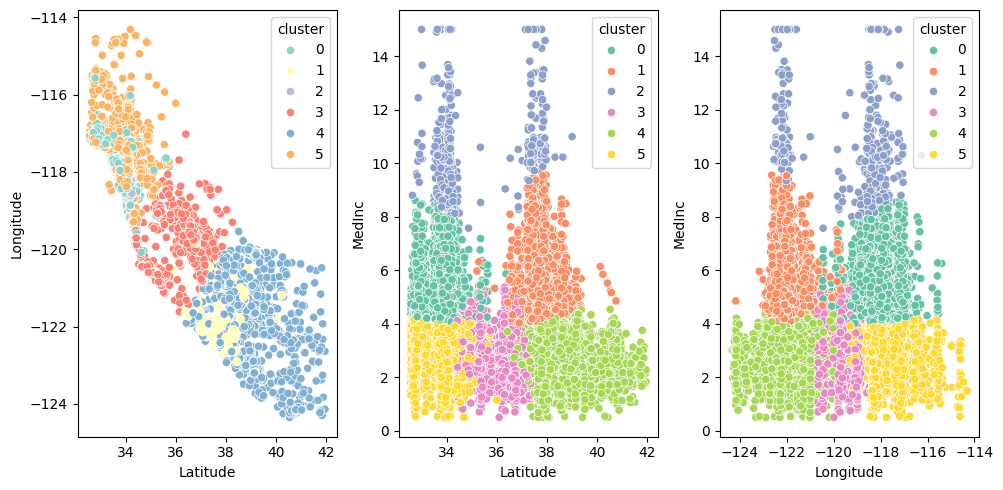

In [11]:
# Plotting the data

import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(1, 3, figsize = (10, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "Set3")
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "Set3")
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "Set3")
plt.tight_layout()

plt.show()

In [10]:
# Predition test

y_test = list(model_unsup.predict(X_test))
X_test["cluster"] = y_test
X_test.head()

,MedInc,Latitude,Longitude,cluster
20046,1.6812,36.06,-119.01,3
3024,2.5313,35.14,-119.46,3
15663,3.4801,37.80,-122.44,4
20484,5.7376,34.28,-118.72,0
9814,3.7250,36.62,-121.93,4


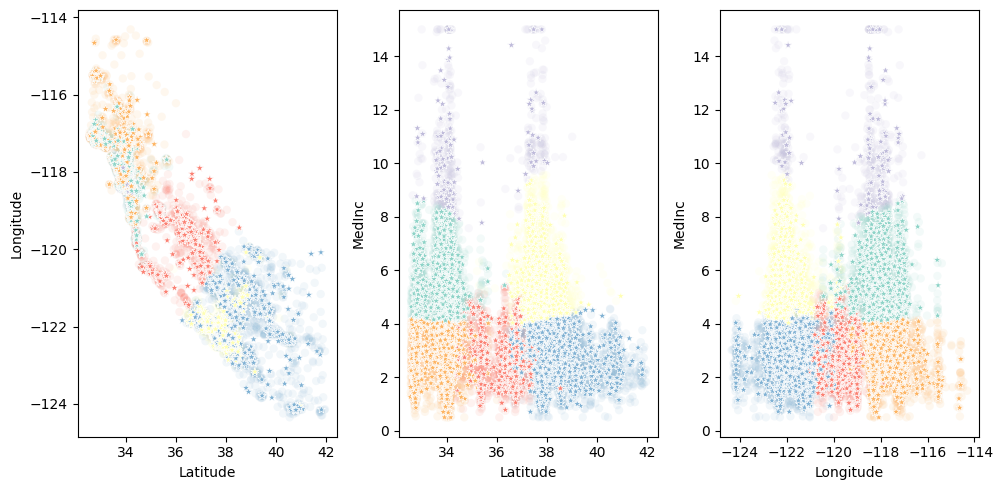

In [12]:
# Plotting predition test

fig, axis = plt.subplots(1, 3, figsize = (10, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "Set3", alpha  = 0.1)
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "Set3", alpha  = 0.1)
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "Set3", alpha  = 0.1)

sns.scatterplot(ax = axis[0], data = X_test, x = "Latitude", y = "Longitude", hue = "cluster", palette = "Set3", marker = "*")
sns.scatterplot(ax = axis[1], data = X_test, x = "Latitude", y = "MedInc", hue = "cluster", palette = "Set3", marker = "*")
sns.scatterplot(ax = axis[2], data = X_test, x = "Longitude", y = "MedInc", hue = "cluster", palette = "Set3", marker = "*")

plt.tight_layout()

for ax in axis:
    ax.legend([],[], frameon=False)

plt.show()

In [13]:
# Clasification model

from sklearn.tree import DecisionTreeClassifier

model_sup = DecisionTreeClassifier(random_state = 88)
model_sup.fit(X_train, y_train)

DecisionTreeClassifier(random_state=88)

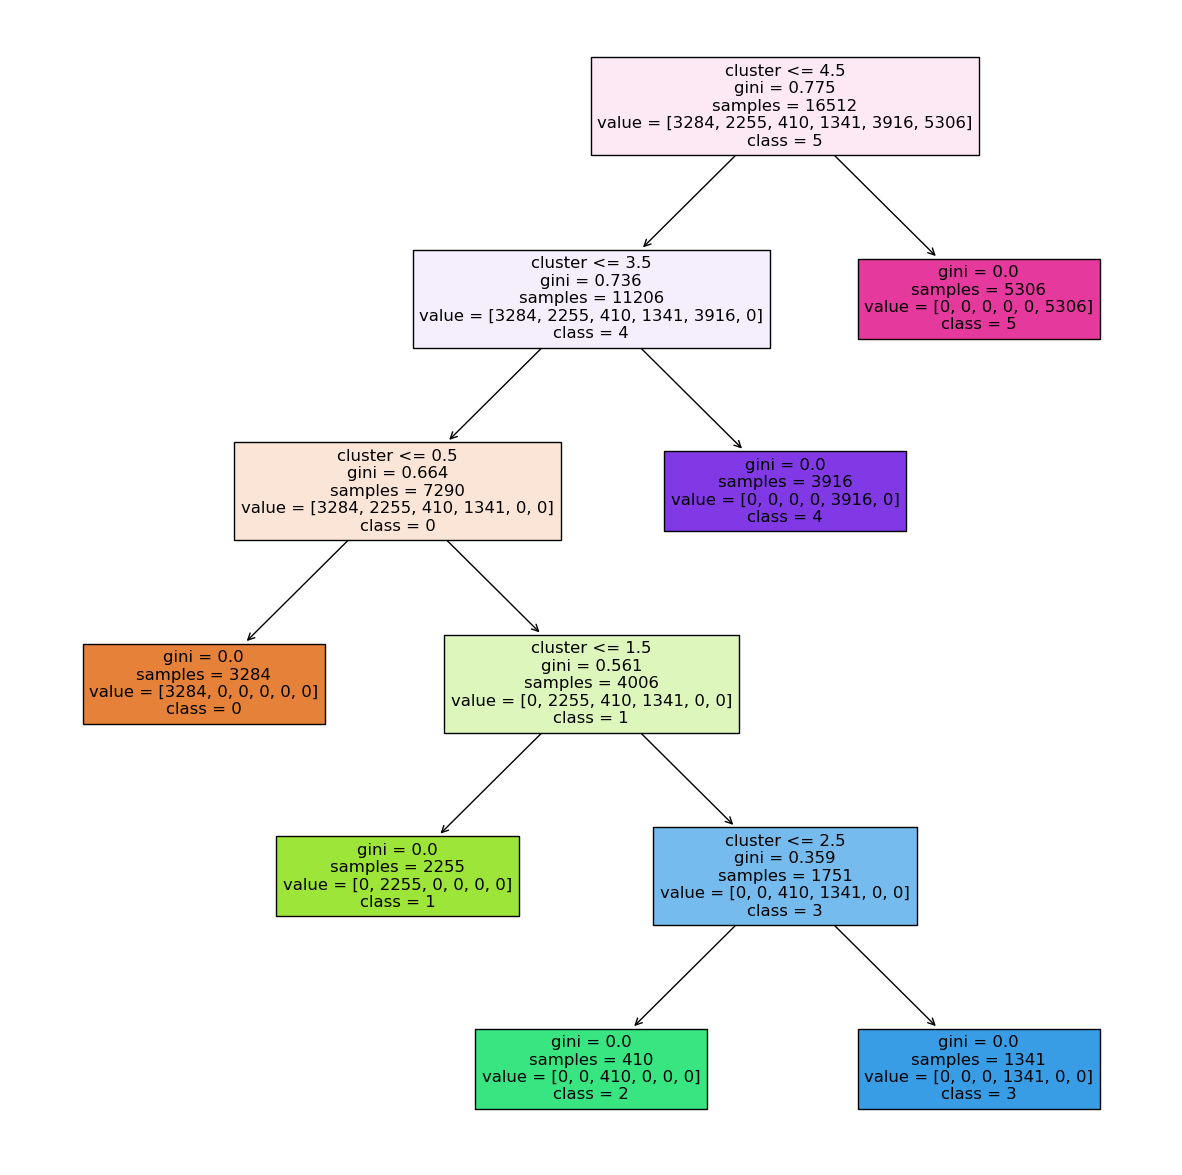

In [14]:
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model_sup, feature_names = list(X_train.columns), class_names = ["0", "1", "2", "3", "4", "5"], filled = True)

plt.show()

In [15]:
y_pred = model_sup.predict(X_test)
y_pred

array([3, 3, 4, ..., 1, 3, 5])

In [16]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

1.0

In [17]:
from pickle import dump

dump(model_unsup, open("k-means_default_88.sav", "wb"))
dump(model_sup, open("decision_tree_classifier_default_88.sav", "wb"))